### Machine Learning Regression Project: Predicting Home Prices in Banglore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

#### Data Load: Load banglore home prices into a dataframe

In [2]:
df1 = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

#### Drop features that has no business value to build our model

In [6]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### Data Cleaning: Handle NA values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Feature Engineering

#### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\SIVA\Anaconda3\envs\envpytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


#### Explore total_sqft feature

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True  

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion.

In [15]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) ==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


#### For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [18]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


### Feature Engineering

#### Add new feature called price per square feet

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = round(df5['price']*100000 / df5['total_sqft'], 2)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [20]:
df5.location.nunique()

1304

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [21]:
df5.location = df5['location'].apply(lambda x: x.strip())
location_num = df5.location.value_counts()
location_num.tail(10)

Bellandur,                      1
CMH Road                        1
Ganganahalli                    1
Ramamohanapuram                 1
Muthyala Nagar                  1
RTO ullalu                      1
Govindraja Nagar                1
Soppahalli                      1
Binny Mills Employees Colony    1
Cambridge  road                 1
Name: location, dtype: int64

In [22]:
location_lessthan_10 = location_num[location_num <= 10]
location_lessthan_10.count()

1052

In [23]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_lessthan_10 else x)
df5['location'].nunique()

242

In [24]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


### Outlier Removal Using Business Logic

In [25]:
df5[df5['total_sqft'] / df5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


#### We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [26]:
df5.shape

(13246, 7)

In [27]:
df6 = df5[~(df5['total_sqft'] / df5['bhk']<300)]
df6.shape

(12502, 7)

### Outlier Removal Using Standard Deviation and Mean

In [28]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [29]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        # print('Key{} SubDF {}'.format(key, subdf))
        mn = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        within_range_data = subdf[(subdf.price_per_sqft > (mn-sd)) & (subdf.price_per_sqft <= (mn+sd))]
        df_out = pd.concat([df_out, within_range_data], ignore_index = True)
    return df_out

In [30]:
df7 = remove_price_per_sqft_outliers(df6)
df7.shape

(10241, 7)

###### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

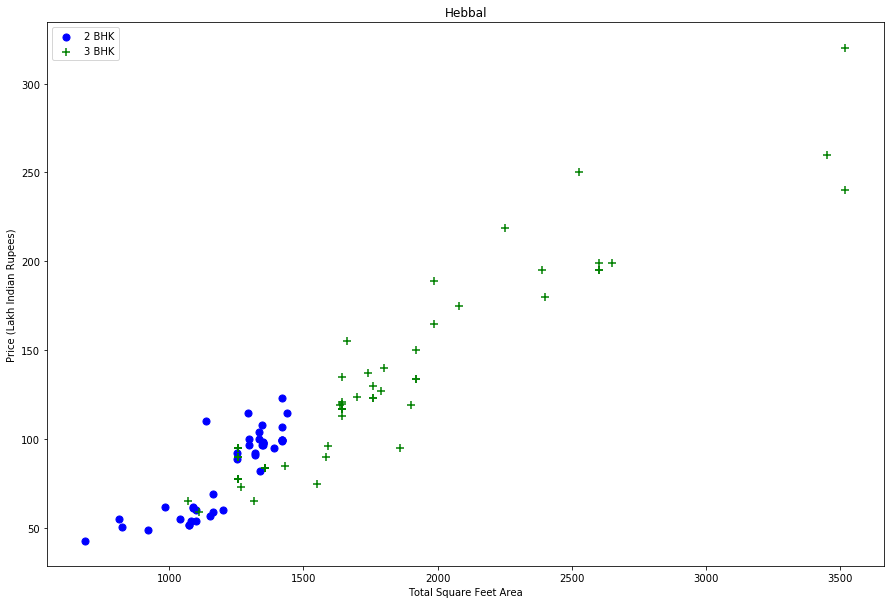

In [31]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

###### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

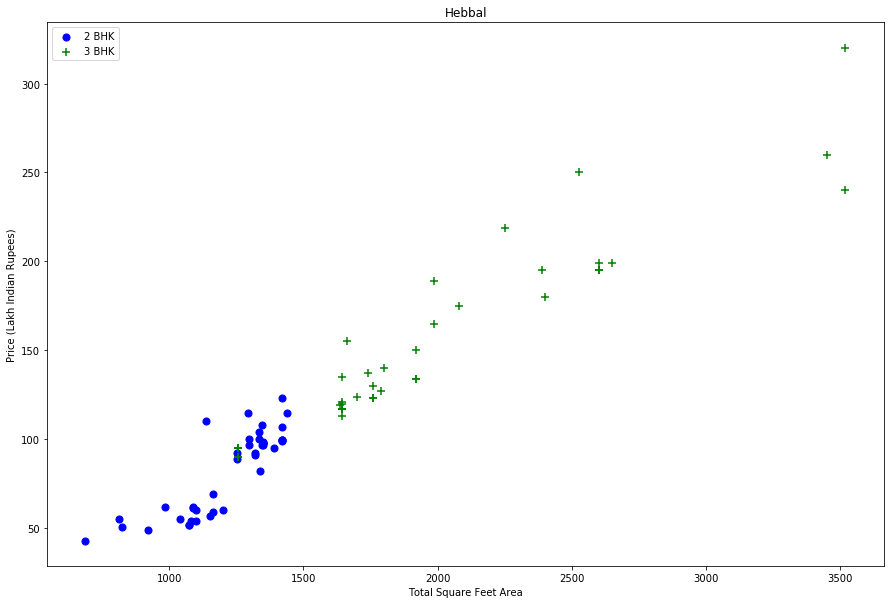

In [33]:
plot_scatter_chart(df8,"Hebbal")

#### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0.5, 0, 'Count')

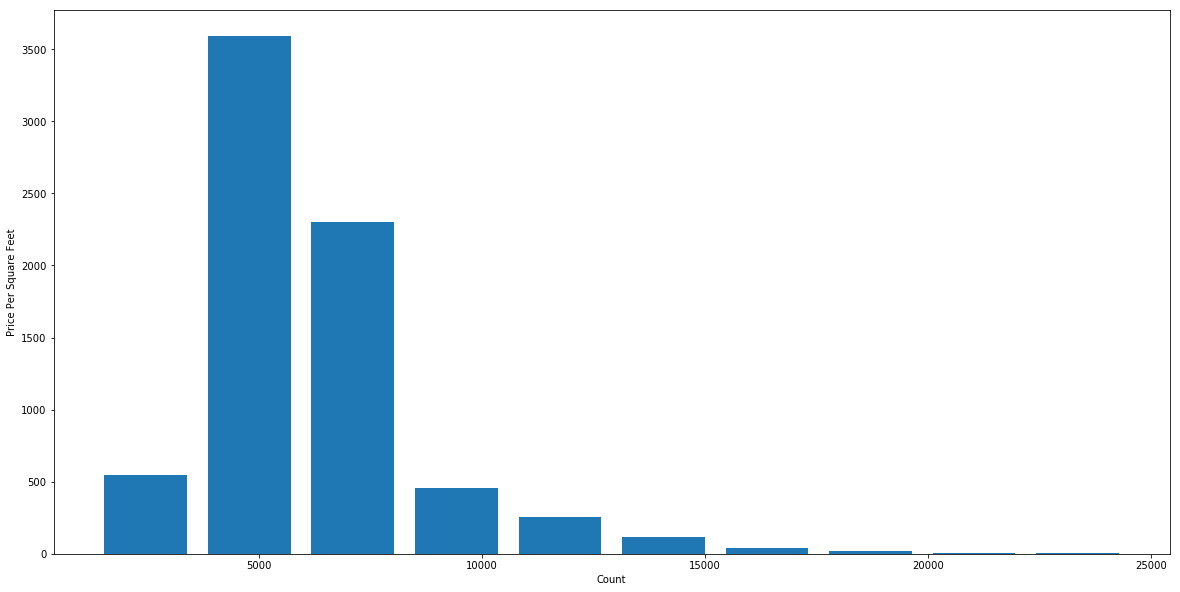

In [34]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8['price_per_sqft'], rwidth = .8)
plt.ylabel('Price Per Square Feet')
plt.xlabel('Count')
#plt.show()

### Outlier Removal Using Bathrooms Feature

In [35]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
df8[df8['bath'] > df8['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [37]:
df9 = df8[df8['bath'] < df8['bhk']+2]
df9.shape

(7251, 7)

In [38]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Use One Hot Encoding For Location

In [39]:
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df11 = pd.concat([df10, dummies.drop('other', axis = 1)], axis = 1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df12 = df11.drop(['location'], axis= 1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df12.shape

(7251, 245)

### Build a Model Now...

In [43]:
x = df12.drop(['price'], axis = 1)
y = df12['price']

In [44]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression

In [45]:
train_x, test_x, train_y, test_y = tts(x, y, test_size = 0.2, random_state = 10)

In [46]:
lr_mod = LinearRegression()
lr_mod.fit(train_x, train_y)
lr_mod.score(test_x, test_y)

0.8452277697874278

In [47]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(lr_mod, x, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [49]:
xgb_mod = xgb.XGBRegressor()

n_estimators = [int(x) for x in np.linspace(1000, 2200, 13)]
max_depth = [int(x) for x in np.linspace(1, 10, 10)]
learning_rate = [round(float(x), 2) for x in np.linspace(0.04, 0.4, 10)]
alpha = [int(x) for x in np.linspace(80, 170, 10)]

print(n_estimators, '\n', max_depth, '\n', learning_rate, '\n', alpha)

xgb_params = {
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    'learning_rate': learning_rate,
    'colsample_bytree' : [0.02, 0.03, 0.04, 0.05, 0.06],
    'alpha' : alpha
}

[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200] 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 [0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4] 
 [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]


{'n_estimators': 1500,
 'max_depth': 2,
 'learning_rate': 0.12,
 'colsample_bytree': 0.05,
 'alpha': 75}

In [50]:
xgb_results = RandomizedSearchCV(xgb_mod, xgb_params, n_iter = 100, cv = 5, random_state = 42, n_jobs = 1)

In [51]:
xgb_results.fit(x,y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   param_distributions={'alpha': [80, 90, 100, 110, 120, 130,
            

In [52]:
table = pd.DataFrame(xgb_results.cv_results_)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.212724,0.192820,0.044586,0.004716,1200,1,0.2,0.05,160,"{'n_estimators': 1200, 'max_depth': 1, 'learni...",0.518347,0.698368,0.587632,0.467840,0.718026,0.598043,0.097851,31
1,7.695598,0.696445,0.081748,0.028603,1000,6,0.08,0.04,100,"{'n_estimators': 1000, 'max_depth': 6, 'learni...",0.472475,0.671169,0.523806,0.485567,0.691002,0.568804,0.093428,96
2,6.528262,0.053527,0.053570,0.005780,1200,7,0.28,0.02,80,"{'n_estimators': 1200, 'max_depth': 7, 'learni...",0.493657,0.665733,0.559755,0.403142,0.734085,0.571275,0.118199,94
3,8.956470,0.193050,0.090749,0.012633,1300,6,0.16,0.06,130,"{'n_estimators': 1300, 'max_depth': 6, 'learni...",0.542802,0.704802,0.572529,0.453927,0.736321,0.602076,0.104794,15
4,6.731545,0.025797,0.059367,0.007704,1100,4,0.08,0.05,170,"{'n_estimators': 1100, 'max_depth': 4, 'learni...",0.515071,0.694681,0.566022,0.476450,0.711253,0.592696,0.094559,49
5,6.521465,0.147995,0.043575,0.004714,1300,1,0.36,0.03,160,"{'n_estimators': 1300, 'max_depth': 1, 'learni...",0.535021,0.691916,0.586370,0.450362,0.727908,0.598315,0.101582,29
6,11.216177,0.105497,0.053570,0.006213,2200,1,0.2,0.06,140,"{'n_estimators': 2200, 'max_depth': 1, 'learni...",0.545902,0.706026,0.605334,0.438018,0.738252,0.606706,0.108925,3
7,7.210471,0.328603,0.079755,0.006965,1000,9,0.28,0.05,90,"{'n_estimators': 1000, 'max_depth': 9, 'learni...",0.525442,0.686967,0.554544,0.445388,0.741003,0.590669,0.108203,58
8,5.785487,0.136007,0.055369,0.005950,1000,3,0.12,0.04,160,"{'n_estimators': 1000, 'max_depth': 3, 'learni...",0.497368,0.685195,0.565409,0.461220,0.708323,0.583503,0.098611,74
9,12.101270,0.123399,0.071760,0.009363,2200,2,0.36,0.06,80,"{'n_estimators': 2200, 'max_depth': 2, 'learni...",0.539086,0.686744,0.570409,0.442341,0.727242,0.593164,0.102882,47


In [53]:
xgb_results.best_params_

{'n_estimators': 1100,
 'max_depth': 2,
 'learning_rate': 0.28,
 'colsample_bytree': 0.05,
 'alpha': 130}

In [54]:
xgb_results.best_score_

0.6072297394294698

### Find best model using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [57]:
def find_best_model_using_gridsearchcv(x,y):
    model_and_params = {
        
         'linear_regression': 
        {
            'model': LinearRegression(),
            'params': 
            {
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.5, 1, 1.5],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'random_forest' : {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [90, 95, 100, 103],
                'max_depth' : [35, 36, 37, 39]
            } 
        }             
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    
    for model_name, mp in model_and_params.items():
        gs = GridSearchCV(mp['model'], mp['params'], cv = cv)
        gs.fit(x, y)
        scores.append({
            'model_name' : model_name,
            'best_score' : gs.best_score_,
            'best_param' : gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model_name', 'best_score', 'best_param'])     
    

In [58]:
find_best_model_using_gridsearchcv(x,y)

,model_name,best_score,best_param
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.713989,"{'alpha': 0.5, 'selection': 'cyclic'}"
2,random_forest,0.787304,"{'max_depth': 35, 'n_estimators': 103}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

### Test the model for few properties

In [59]:
def predict_price(location, sqft, bath, bhk):
    location_index = np.where(x.columns == location)[0][0]
    print('location index : ', location_index)
    
    x_test = np.zeros(len(x.columns))
    x_test[0] = sqft
    x_test[1] = bath
    x_test[2] = bhk
    if location_index >= 0:
        x_test[location_index] = 1
        
    return lr_mod.predict([x_test])[0]

In [60]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

location index :  4


83.49904677167729

In [61]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

location index :  116


181.27815484007027

In [63]:
predict_price('Indira Nagar',1000, 3, 3)

location index :  116


184.58430202033597

### Export the tested model to a pickle file

In [64]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as F:
    pickle.dump(lr_mod, F)

### Export location and column information to a file that will be useful later on in our prediction application

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as J:
    J.write(json.dumps(columns))